# image treatment


In [44]:
pip install patchify

Defaulting to user installation because normal site-packages is not writeable


Note: you may need to restart the kernel to use updated packages.


In [45]:
import os
import cv2
from PIL import Image
import numpy as np
from patchify import patchify
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import random

from matplotlib import pyplot as plt


In [46]:
minmaxscaler = MinMaxScaler()

In [47]:
ls -lah '/home/emma/Escritorio/Satellite image recognition AI/Satellite_image_recognition_AI'

total 27M
drwxrwxr-x  7 emma emma 4,0K sep 30 10:41  ./
drwxrwxr-x  3 emma emma 4,0K sep 30 10:25  ../
-rw-rw-r--  1 emma emma 3,1M sep 30 10:55  AI.ipynb
-rw-rw-r--  1 emma emma 292K sep 30 10:19  app.ipynb
drwxrwxr-x  4 emma emma 4,0K sep 24 13:56  content/
drwxrwxr-x  8 emma emma 4,0K sep 30 10:28  .git/
-rw-rw-r--  1 emma emma   66 sep 30 10:25  .gitattributes
drwxr-xr-x  4 emma emma 4,0K sep 24 10:34  models/
-rw-rw-r--  1 emma emma 1,5K sep 30 10:56  readme
drwxrwxr-x  2 emma emma 4,0K sep 30 10:50  readme_content/
-rw-rw-r--  1 emma emma 377K sep  9 21:00  satellite_model_plot.png
-rw-rw-r--  1 emma emma  23M sep 30 10:15  satellite_segmentation_80.h5
drwx------ 10 emma emma 4,0K sep  8 21:01 'Semantic segmentation dataset'/


In [48]:
dataset_root_folder = '/home/emma/Escritorio/Satellite image recognition AI/Satellite_image_recognition_AI'


In [49]:
dataset_name = "Semantic segmentation dataset"

In [50]:
for path, subdirs, files in os.walk(os.path.join(dataset_root_folder,dataset_name)):
  dir_name = path.split(os.path.sep)[-1]
  #print(dir_name)
  if dir_name == 'images':
    images = os.listdir(path)
    #print(images)
    for i, image_name in enumerate(images):
      if (image_name.endswith('.jpg')):
        #print(image_name)
        a = True

In [51]:
image_patch_size = 256

In [52]:
image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile 1/images/image_part_001.jpg',1)

In [53]:
image_patches = patchify(image,(image_patch_size,image_patch_size,3),step=image_patch_size)

In [54]:
len(image_patches)

2

In [55]:
#minmaxscaler
image_x = image_patches[0,0,:,:]
image_y = minmaxscaler.fit_transform(image_x.reshape(-1, image_x.shape[-1])).reshape(image_x.shape)

In [56]:
image_y[0].shape

(256, 256, 3)

In [57]:
type(Image.fromarray(image))

PIL.Image.Image

In [58]:
image.shape

(644, 797, 3)

In [59]:
image.shape[1]//image_patch_size

3

In [60]:
image_dataset = []
mask_dataset = []

for image_type in['images', 'masks']:
  if image_type == 'images':
    image_extension = 'jpg'
  else:
    image_extension = 'png'

  for title_id in range(1,8):
    for image_id in range(1, 20):
      image = cv2.imread(f'{dataset_root_folder}/{dataset_name}/Tile {title_id}/{image_type}/image_part_00{image_id}.{image_extension}',1)
      if image is not None:
        if image_type == 'masks':
          image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        #print(image.shape)
        size_x = (image.shape[1]//image_patch_size)*image_patch_size
        size_y = (image.shape[0]//image_patch_size)*image_patch_size
        #print("{} --- {} - {}".format(image.shape, size_x, size_y))
        image = Image.fromarray(image)
        image = image.crop((0,0,size_x,size_y))
        #print(image.size[0], image.size[1])
        image = np.array(image)
        patched_images = patchify(image,(image_patch_size,image_patch_size,3),step=image_patch_size)
        #print(len(patched_images))
        for i in range(patched_images.shape[0]):
          for j in range(patched_images.shape[1]):
            if image_type == 'images':
              individual_patched_image = patched_images[i,j,:,:]
              #print(individual_patched_image.shape)
              individual_patched_image = minmaxscaler.fit_transform(individual_patched_image.reshape(-1, individual_patched_image.shape[-1])).reshape(individual_patched_image.shape)
              individual_patched_image = individual_patched_image[0]
              #print (individual_patched_image.shape)
              image_dataset.append(individual_patched_image)
            elif image_type == 'masks':
              individual_patched_mask = patched_images[i,j,:,:]
              individual_patched_mask = individual_patched_mask[0]
              mask_dataset.append(individual_patched_mask)



[ WARN:0@244.346] global loadsave.cpp:248 findDecoder imread_('/home/emma/Escritorio/Satellite image recognition AI/Satellite_image_recognition_AI/Semantic segmentation dataset/Tile 1/images/image_part_0010.jpg'): can't open/read file: check file path/integrity
[ WARN:0@244.346] global loadsave.cpp:248 findDecoder imread_('/home/emma/Escritorio/Satellite image recognition AI/Satellite_image_recognition_AI/Semantic segmentation dataset/Tile 1/images/image_part_0011.jpg'): can't open/read file: check file path/integrity
[ WARN:0@244.346] global loadsave.cpp:248 findDecoder imread_('/home/emma/Escritorio/Satellite image recognition AI/Satellite_image_recognition_AI/Semantic segmentation dataset/Tile 1/images/image_part_0012.jpg'): can't open/read file: check file path/integrity
[ WARN:0@244.346] global loadsave.cpp:248 findDecoder imread_('/home/emma/Escritorio/Satellite image recognition AI/Satellite_image_recognition_AI/Semantic segmentation dataset/Tile 1/images/image_part_0013.jpg'): 

[ WARN:0@245.250] global loadsave.cpp:248 findDecoder imread_('/home/emma/Escritorio/Satellite image recognition AI/Satellite_image_recognition_AI/Semantic segmentation dataset/Tile 4/images/image_part_0010.jpg'): can't open/read file: check file path/integrity
[ WARN:0@245.250] global loadsave.cpp:248 findDecoder imread_('/home/emma/Escritorio/Satellite image recognition AI/Satellite_image_recognition_AI/Semantic segmentation dataset/Tile 4/images/image_part_0011.jpg'): can't open/read file: check file path/integrity
[ WARN:0@245.250] global loadsave.cpp:248 findDecoder imread_('/home/emma/Escritorio/Satellite image recognition AI/Satellite_image_recognition_AI/Semantic segmentation dataset/Tile 4/images/image_part_0012.jpg'): can't open/read file: check file path/integrity
[ WARN:0@245.250] global loadsave.cpp:248 findDecoder imread_('/home/emma/Escritorio/Satellite image recognition AI/Satellite_image_recognition_AI/Semantic segmentation dataset/Tile 4/images/image_part_0013.jpg'): 

In [61]:
print(len(image_dataset))
print(len(mask_dataset))

945
945


In [62]:
image_dataset = np.array(image_dataset)
mask_dataset = np.array(mask_dataset)

In [63]:
print(len(image_dataset))
print(len(mask_dataset))

945
945


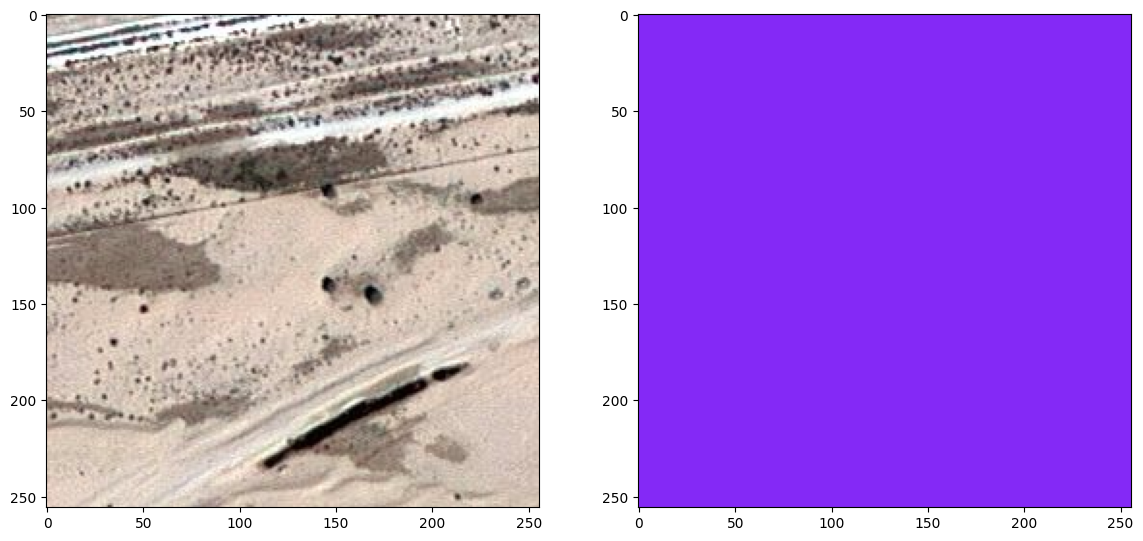

In [64]:
random_image_id = random.randint(0,len(image_dataset))
plt.figure(figsize = (14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
plt.imshow(mask_dataset[random_image_id])

In [65]:
class_building = '#3C1098'
class_building = class_building.lstrip('#')
class_building = np.array(tuple(int(class_building[i:i+2], 16) for i in (0,2,4)))
print(class_building)

class_land = '#8429F6'
class_land = class_land.lstrip('#')
class_land = np.array(tuple(int(class_land[i:i+2], 16) for i in (0,2,4)))
print(class_land)

class_road = '#6EC1E4'
class_road = class_road.lstrip('#')
class_road = np.array(tuple(int(class_road[i:i+2], 16) for i in (0,2,4)))
print(class_road)

class_vegetation = 'FEDD3A'
class_vegetation = class_vegetation.lstrip('#')
class_vegetation = np.array(tuple(int(class_vegetation[i:i+2], 16) for i in (0,2,4)))
print(class_vegetation)

class_water = '#E2A929'
class_water = class_water.lstrip('#')
class_water = np.array(tuple(int(class_water[i:i+2], 16) for i in (0,2,4)))
print(class_water)

class_unlabeled = '#9B9B9B'
class_unlabeled = class_unlabeled.lstrip('#')
class_unlabeled = np.array(tuple(int(class_unlabeled[i:i+2], 16) for i in (0,2,4)))
print(class_unlabeled)

[ 60  16 152]
[132  41 246]
[110 193 228]
[254 221  58]
[226 169  41]
[155 155 155]


In [66]:
mask_dataset.shape[0]

945

In [67]:
label = individual_patched_mask

In [68]:
def rgb_to_label(label):
  label_segment = np.zeros(label.shape, dtype = np.uint8)
  label_segment[np.all(label == class_water, axis = -1)] = 0
  label_segment[np.all(label == class_land, axis = -1)] = 1
  label_segment[np.all(label == class_road, axis = -1)] = 2
  label_segment[np.all(label == class_building, axis = -1)] = 3
  label_segment[np.all(label == class_vegetation, axis = -1)] = 4
  label_segment[np.all(label == class_unlabeled, axis = -1)] = 5
  label_segment = label_segment[:,:,0]
  return label_segment

In [69]:
labels = []
for i in range(mask_dataset.shape[0]):
  label = rgb_to_label(mask_dataset[i])
  labels.append(label)

In [70]:
len(labels)

945

In [71]:
labels = np.array(labels)
labels[3]

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [72]:
labels = np.expand_dims(labels, axis=3)

In [73]:
labels[0]

array([[[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       ...,

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]],

       [[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]]], dtype=uint8)

In [74]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5], dtype=uint8)

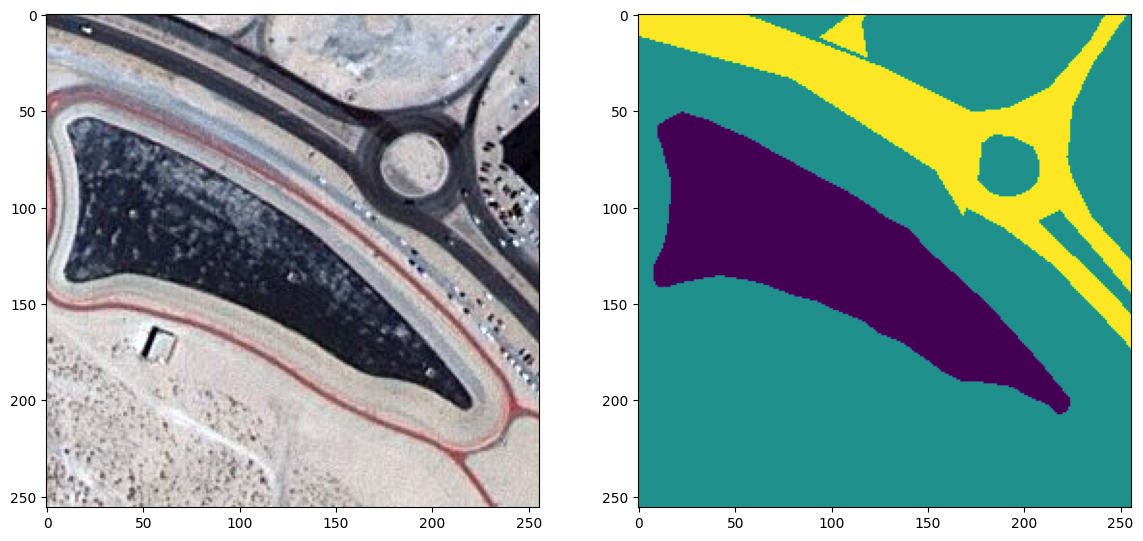

In [75]:
random_image_id = random.randint(0,len(image_dataset))

plt.figure(figsize = (14,8))
plt.subplot(121)
plt.imshow(image_dataset[random_image_id])
plt.subplot(122)
#plt.imshow(mask_dataset[random_image_id])
plt.imshow(labels[random_image_id][:,:,0])

In [76]:
total_classes = len(np.unique(labels))
total_classes

6

In [77]:
from tensorflow.keras.utils import to_categorical

2023-09-30 10:57:50.389253: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-30 10:57:50.512136: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-09-30 10:57:50.974795: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/emma/.local/lib/python3.10/site-packages/cv2/../../lib64:
2023-09-30 10:57:50.974846: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7';

In [78]:
labels_categorcal_dataset = to_categorical(labels,num_classes=total_classes)

In [79]:
labels_categorcal_dataset.shape

(945, 256, 256, 6)

In [80]:
master_trianing_dataset = image_dataset

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
X_train, X_test, Y_train, Y_test = train_test_split(master_trianing_dataset,labels_categorcal_dataset, test_size=0.15, random_state=100)

In [83]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)



(803, 256, 256, 3)
(142, 256, 256, 3)
(803, 256, 256, 6)
(142, 256, 256, 6)


In [84]:
image_height = X_train.shape[1]
image_width = X_train.shape[2]
image_channels = X_train.shape[3]
total_classes = Y_train.shape[3]

In [85]:
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)
print(len(image_dataset))
print(len(mask_dataset))

256
256
3
6
945
945


# Deep Learning


In [86]:
from tensorflow import keras
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose
from keras.layers import concatenate, BatchNormalization, Dropout, Lambda

In [87]:
from keras import backend as K

In [88]:
def jaccard_coef(y_true, y_pred):
  y_true_flatten = K.flatten(y_true)
  y_pred_flatten = K.flatten(y_pred)
  intersection = K.sum(y_true_flatten*y_pred_flatten)
  final_coef_value = (intersection + 1.0) /(K.sum(y_true_flatten) + K.sum(y_pred_flatten) - intersection + 1.0)
  return final_coef_value

In [89]:
def multi_unet_model(n_classes=5, image_height=256, image_width=256, image_channels=1):

  inputs = Input((image_height,image_width,image_channels))

  source_input = inputs

  #c1 will be 1st convolutional layer, down in the u diagram
  c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(source_input)
  c1 = Dropout(0.2)(c1)
  c1 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c1)
  p1 = MaxPooling2D((2,2))(c1)

  #c2 will be 2nd convolutional layer, down in the u diagram
  c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p1)
  c2 = Dropout(0.2)(c2)
  c2 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c2)
  p2 = MaxPooling2D((2,2))(c2)

  #c3 will be 3nd convolutional layer, down in the u diagram
  c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p2)
  c3 = Dropout(0.2)(c3)
  c3 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c3)
  p3 = MaxPooling2D((2,2))(c3)

  #c4 will be 4th convolutional layer, down in the u diagram
  c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p3)
  c4 = Dropout(0.2)(c4)
  c4 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c4)
  p4 = MaxPooling2D((2,2))(c4)

  #c5 will be 5th convolutional layer, lower part of the diagram
  c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(p4)
  c5 = Dropout(0.2)(c5)
  c5 = Conv2D(256, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c5)

  #c6 will be 6th convolutional layer, up in the u diagram
  u6 = Conv2DTranspose(128, (2,2), strides=(2,2), padding="same")(c5)
  u6 = concatenate([u6,c4])
  c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u6)
  c6 = Dropout(0.2)(c6)
  c6 = Conv2D(128, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c6)

  #c7 will be 7th convolutional layer, up in the u diagram
  u7 = Conv2DTranspose(64, (2,2), strides=(2,2), padding="same")(c6)
  u7 = concatenate([u7,c3])
  c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u7)
  c7 = Dropout(0.2)(c7)
  c7 = Conv2D(64, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c7)

  #c8 will be 8th convolutional layer, up in the u diagram
  u8 = Conv2DTranspose(32, (2,2), strides=(2,2), padding="same")(c7)
  u8 = concatenate([u8,c2])
  c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u8)
  c8 = Dropout(0.2)(c8)
  c8 = Conv2D(32, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c8)

  #c9 will be 8th convolutional layer, last part of the diagram
  u9 = Conv2DTranspose(16, (2,2), strides=(2,2), padding="same")(c8)
  u9 = concatenate([u9,c1], axis=3)
  c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(u9)
  c9 = Dropout(0.2)(c9)
  c9 = Conv2D(16, (3,3), activation="relu", kernel_initializer="he_normal", padding="same")(c9)

  outputs = Conv2D(n_classes, (1,1), activation="softmax")(c9)
  model = Model(inputs=[inputs], outputs=[outputs])
  return model

In [90]:
metrics = ["accuracy", jaccard_coef]

In [91]:
print(image_height)
print(image_width)
print(image_channels)
print(total_classes)

256
256
3
6


In [92]:
def get_deep_learning_model():
  return multi_unet_model(n_classes=total_classes,
                          image_height=image_height,
                          image_width=image_width,
                          image_channels=image_channels)

In [93]:
model = get_deep_learning_model()

2023-09-30 10:57:52.808067: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-09-30 10:57:52.836256: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-09-30 10:57:52.836422: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-09-30 10:57:52.836898: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [94]:
#model.get_config

# Loss function

In [95]:
weights = [0.166,0.166,0.166,0.166,0.166,0.166]

In [96]:
import segmentation_models as sm

Segmentation Models: using `keras` framework.


In [97]:
dice_loss = sm.losses.DiceLoss(class_weights = weights)

In [98]:
focal_loss= sm.losses.CategoricalFocalLoss()

In [99]:
total_loss = dice_loss + (1*focal_loss)

# Model Compilation

In [100]:
import tensorrt
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
  except RuntimeError as e:
    print(e)
    
print("TensorFlow version:", tf.__version__)
print("CUDA version:", tf.sysconfig.get_build_info()['cuda_version'])
print("cuDNN version:", tf.sysconfig.get_build_info()['cudnn_version'])
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Physical devices cannot be modified after being initialized
TensorFlow version: 2.10.0
CUDA version: 11.2
cuDNN version: 8
Num GPUs Available:  1


In [101]:
#tf.keras.backend.clear_session()

In [102]:
model.compile(optimizer="adam", loss=total_loss, metrics=metrics)

In [103]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 16  448         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 dropout (Dropout)              (None, 256, 256, 16  0           ['conv2d[0][0]']                 
                                )                                                             

In [104]:
class PlotLoss(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.val_losses = []
        self.fig = plt.figure()
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1

        clear_output(wait=True)
        plt.plot(self.x, self.losses, label="loss")
        plt.plot(self.x, self.val_losses, label="val_loss")
        plt.legend()
        plt.show();

plot_loss = PlotLoss()

In [105]:
import keras 
from IPython.display import clear_output

%matplotlib inline

In [106]:
class PlotLoss(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = [] 
        self.val_losses = []
        self.jaccard_coef = []
        self.val_jaccard_coef = []
        self.fig = plt.figure()
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.i += 1

        clear_output(wait=True)
        plt.plot(self.x, self.losses, label = "loss")
        plt.plot(self.x, self.val_losses, label = "val_losses")
        plt.legend()
        plt.show();

    
plot_loss = PlotLoss()

In [107]:
class PlotLossEx(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = [] 
        self.val_losses = []
        self.jaccard_coef = []
        self.val_jaccard_coef = []
        self.fig = plt.figure()
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        self.jaccard_coef.append(logs.get('jaccard_coef'))
        self.val_jaccard_coef.append(logs.get('val_jaccard_coef'))
        self.i += 1

        plt.figure(figsize=(14,8))
        f, (graph1, graph2) = plt.subplots(1,2,sharex=True)

        clear_output(wait=True)
        graph1.set_yscale('log')
        graph1.plot(self.x, self.losses, label = "loss")
        graph1.plot(self.x, self.val_losses, label = "val_losses")
        graph1.legend()
        graph2.set_yscale('log')
        graph2.plot(self.x, self.jaccard_coef, label = "jaccard_coef")
        graph2.plot(self.x, self.val_jaccard_coef, label = "va_jaccard_coef")
        graph2.legend()
        
        plt.show();

    
plot_loss = PlotLossEx()

# Model training


<Figure size 1400x800 with 0 Axes>

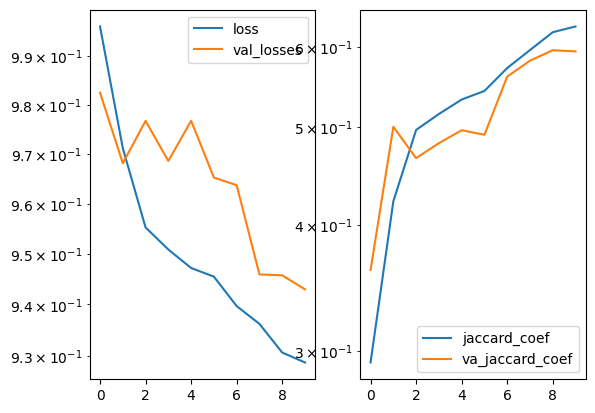

51/51 [==============================] - 6s 111ms/step - loss: 0.9287 - accuracy: 0.8160 - jaccard_coef: 0.6293 - val_loss: 0.9430 - val_accuracy: 0.7826 - val_jaccard_coef: 0.5945


In [108]:
model_history = model.fit(X_train, Y_train,
                          batch_size=16,
                          verbose=1,
                          epochs=10, 
                          validation_data=(X_test, Y_test), 
                          callbacks=[plot_loss],
                          shuffle=False)

In [109]:
history_a = model_history

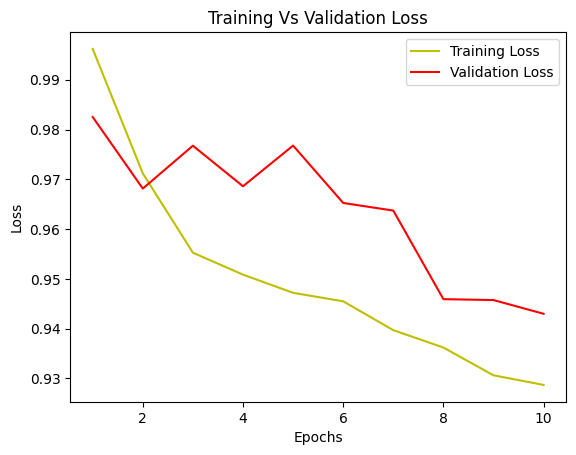

In [110]:
loss = history_a.history['loss']
val_loss = history_a.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'y', label="Training Loss")
plt.plot(epochs, val_loss, 'r', label="Validation Loss")
plt.title("Training Vs Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


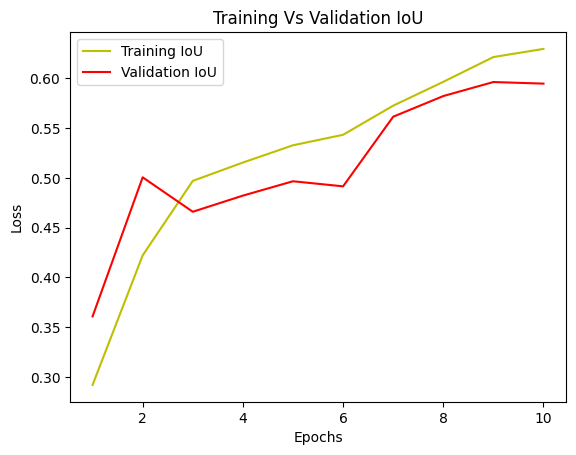

In [111]:
jaccard_coef = history_a.history['jaccard_coef']
val_jaccard_coef = history_a.history['val_jaccard_coef']

epochs = range(1, len(loss)+1)
plt.plot(epochs, jaccard_coef, 'y', label="Training IoU")
plt.plot(epochs, val_jaccard_coef, 'r', label="Validation IoU")
plt.title("Training Vs Validation IoU")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [112]:

model_history.params

{'verbose': 1, 'epochs': 10, 'steps': 51}

In [113]:
y_pred = model.predict(X_test)

4/5 [=======================>......] - ETA: 0s

2023-09-30 10:58:59.581422: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.27GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-09-30 10:58:59.581459: W tensorflow/core/common_runtime/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.27GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


5/5 [==============================] - 1s 45ms/step


In [114]:
len(y_pred)

142

In [115]:
y_pred

array([[[[9.76692066e-02, 4.62154210e-01, 1.74048007e-01,
          7.91908801e-02, 1.25758454e-01, 6.11791983e-02],
         [5.93016781e-02, 6.30466521e-01, 1.41685128e-01,
          4.92617413e-02, 8.63307193e-02, 3.29542197e-02],
         [6.78522065e-02, 6.21765733e-01, 1.15825996e-01,
          3.42324674e-02, 1.33935824e-01, 2.63878200e-02],
         ...,
         [9.09382552e-02, 2.66993225e-01, 1.41674772e-01,
          1.60471834e-02, 4.49875265e-01, 3.44713293e-02],
         [9.28448513e-02, 2.74968177e-01, 1.78287268e-01,
          2.30681375e-02, 3.92153084e-01, 3.86784859e-02],
         [1.20223604e-01, 2.34195769e-01, 1.66469455e-01,
          4.56026308e-02, 3.51224840e-01, 8.22836682e-02]],

        [[6.17028289e-02, 6.50739253e-01, 9.31559503e-02,
          3.55448313e-02, 1.23701461e-01, 3.51557061e-02],
         [2.42214464e-02, 8.59356105e-01, 4.67484072e-02,
          8.67627934e-03, 5.23975529e-02, 8.60018563e-03],
         [2.69368831e-02, 8.29829752e-01, 3.8020

In [116]:
y_pred_argmax = np.argmax(y_pred, axis=3)

In [117]:
len(y_pred_argmax)

142

In [118]:
y_test_argmax = np.argmax(Y_test, axis=3)

In [119]:


#y_test_argmax

# Results


In [120]:

import random

1/1 [==============================] - 0s 347ms/step


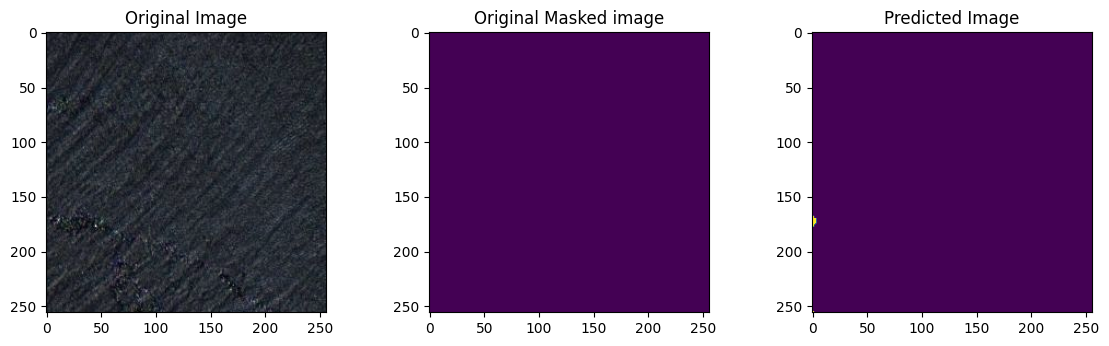

In [121]:

test_image_number = random.randint(0, len(X_test))

test_image = X_test[test_image_number]
ground_truth_image = y_test_argmax[test_image_number]

test_image_input = np.expand_dims(test_image, 0)

prediction = model.predict(test_image_input)
predicted_image = np.argmax(prediction, axis=3)
predicted_image = predicted_image[0,:,:]



plt.figure(figsize=(14,8))
plt.subplot(231)
plt.title("Original Image")
plt.imshow(test_image)
plt.subplot(232)
plt.title("Original Masked image")
plt.imshow(ground_truth_image)
plt.subplot(233)
plt.title("Predicted Image")
plt.imshow(predicted_image)

# Model saving and reloading (custom loss)

In [122]:
model.save("satellite_segmentation_80.h5")
#model.get_config()

In [123]:
!ls -lah 

total 27M
drwxrwxr-x  7 emma emma 4,0K sep 30 10:41  .
drwxrwxr-x  3 emma emma 4,0K sep 30 10:25  ..
-rw-rw-r--  1 emma emma 3,2M sep 30 10:58  AI.ipynb
-rw-rw-r--  1 emma emma 292K sep 30 10:19  app.ipynb
drwxrwxr-x  4 emma emma 4,0K sep 24 13:56  content
drwxrwxr-x  8 emma emma 4,0K sep 30 10:28  .git
-rw-rw-r--  1 emma emma   66 sep 30 10:25  .gitattributes
drwxr-xr-x  4 emma emma 4,0K sep 24 10:34  models
-rw-rw-r--  1 emma emma 1,5K sep 30 10:56  readme
drwxrwxr-x  2 emma emma 4,0K sep 30 10:50  readme_content
-rw-rw-r--  1 emma emma 377K sep  9 21:00  satellite_model_plot.png
-rw-rw-r--  1 emma emma  23M sep 30 10:59  satellite_segmentation_80.h5
drwx------ 10 emma emma 4,0K sep  8 21:01 'Semantic segmentation dataset'


In [124]:
from keras.models import load_model

In [125]:
import segmentation_models as sm
weights = [0.166,0.166,0.166,0.166,0.166,0.166]
dice_loss = sm.losses.DiceLoss(class_weights = weights)
focal_loss= sm.losses.CategoricalFocalLoss()
total_loss = dice_loss + (1*focal_loss)

In [126]:
saved_model = load_model('./satellite_segmentation_80.h5', 
                         custom_objects=({'dice_loss_plus_1focal_loss':total_loss,
                                          'jaccard_coef':jaccard_coef}))

In [127]:
saved_model.get_config()

{'name': 'model',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 256, 256, 3),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'input_1'},
   'name': 'input_1',
   'inbound_nodes': []},
  {'class_name': 'Conv2D',
   'config': {'name': 'conv2d',
    'trainable': True,
    'dtype': 'float32',
    'filters': 16,
    'kernel_size': (3, 3),
    'strides': (1, 1),
    'padding': 'same',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'groups': 1,
    'activation': 'relu',
    'use_bias': True,
    'kernel_initializer': {'class_name': 'HeNormal', 'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None},
   'name': 'conv2d',
   'inbound_nodes': [[['input_1', 0, 0, {}]]]},
  {'class_name': 'Dropout',
   'config': {'name': '

1/1 [==============================] - 0s 377ms/step


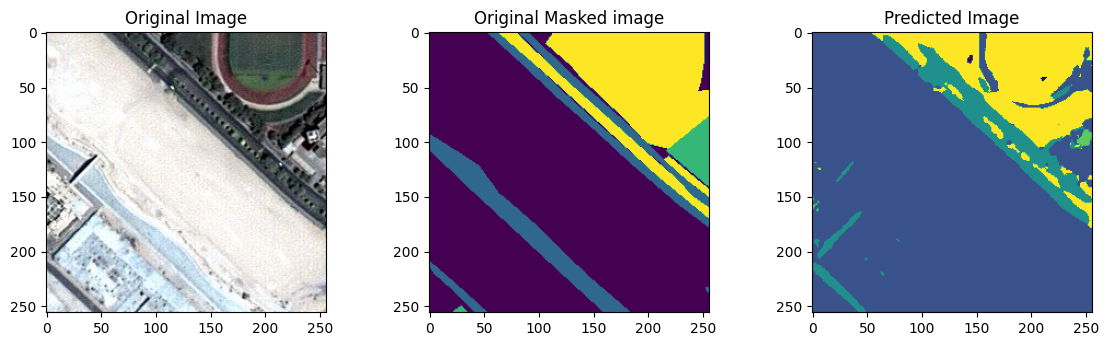

In [128]:
import random
test_image_number = random.randint(0, len(X_test))

test_image = X_test[test_image_number]
ground_truth_image = y_test_argmax[test_image_number]

test_image_input = np.expand_dims(test_image, 0)

prediction = saved_model.predict(test_image_input)
predicted_image = np.argmax(prediction, axis=3)
predicted_image = predicted_image[0,:,:]

plt.figure(figsize=(14,8))
plt.subplot(231)
plt.title("Original Image")
plt.imshow(test_image)
plt.subplot(232)
plt.title("Original Masked image")
plt.imshow(ground_truth_image)
plt.subplot(233)
plt.title("Predicted Image")
plt.imshow(predicted_image)


# Performing Predictions using a custom image from Google earth

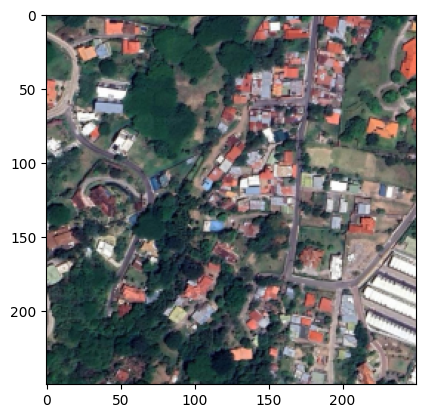

In [129]:
plt.imshow(Image.open('./content/image 42.jpg'))

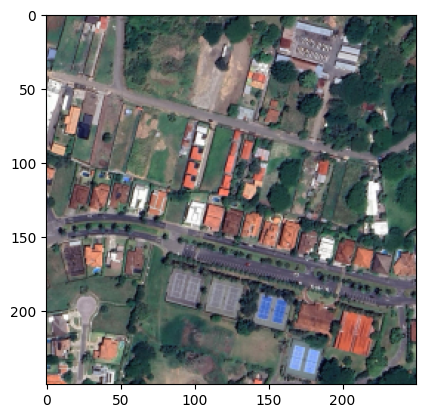

In [130]:
plt.imshow(Image.open('./content/image 43.jpg'))

In [131]:
image = Image.open('./content/image 43.jpg')
image = image.resize((256,256))
image = np.array(image)
image = np.expand_dims(image,0)

In [132]:
prediction = saved_model.predict(image)

1/1 [==============================] - 0s 148ms/step


In [133]:
predicted_image = np.argmax(prediction, axis=3)
predicted_image = predicted_image[0,:,:]

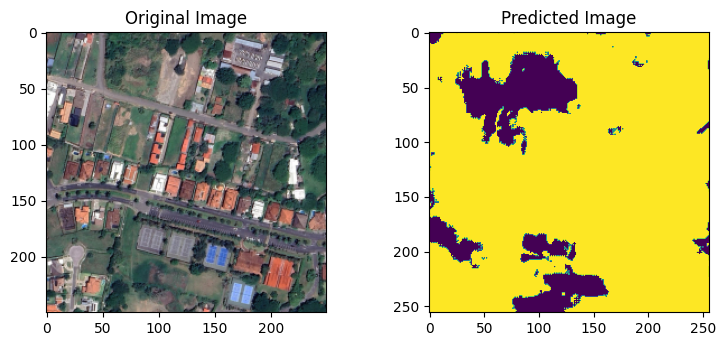

In [134]:
plt.figure(figsize=(14,8))
plt.subplot(231)
plt.title("Original Image")
plt.imshow(Image.open('./content/image 43.jpg'))
plt.subplot(232)
plt.title("Predicted Image")
plt.imshow(predicted_image)

# Collecting Activation and gradients output from Keras Model

In [135]:
!pip install keract

Defaulting to user installation because normal site-packages is not writeable


In [136]:
import keract as ke

In [137]:
activations = ke.get_activations(saved_model, image, nodes_to_evaluate=None, output_format='simple', auto_compile=True)

In [138]:
ke.display_activations(activations, cmap='viridis', save=True, directory='./content/activations/')

input_1 (1, 256, 256, 3) 
conv2d (1, 256, 256, 16) 
dropout (1, 256, 256, 16) 
conv2d_1 (1, 256, 256, 16) 
max_pooling2d (1, 128, 128, 16) 
conv2d_2 (1, 128, 128, 32) 
dropout_1 (1, 128, 128, 32) 
conv2d_3 (1, 128, 128, 32) 
max_pooling2d_1 (1, 64, 64, 32) 
conv2d_4 (1, 64, 64, 64) 
dropout_2 (1, 64, 64, 64) 
conv2d_5 (1, 64, 64, 64) 
max_pooling2d_2 (1, 32, 32, 64) 
conv2d_6 (1, 32, 32, 128) 
dropout_3 (1, 32, 32, 128) 
conv2d_7 (1, 32, 32, 128) 
max_pooling2d_3 (1, 16, 16, 128) 
conv2d_8 (1, 16, 16, 256) 
dropout_4 (1, 16, 16, 256) 
conv2d_9 (1, 16, 16, 256) 
conv2d_transpose (1, 32, 32, 128) 
concatenate (1, 32, 32, 256) 
conv2d_10 (1, 32, 32, 128) 
dropout_5 (1, 32, 32, 128) 
conv2d_11 (1, 32, 32, 128) 
conv2d_transpose_1 (1, 64, 64, 64) 
concatenate_1 (1, 64, 64, 128) 
conv2d_12 (1, 64, 64, 64) 
dropout_6 (1, 64, 64, 64) 
conv2d_13 (1, 64, 64, 64) 
conv2d_transpose_2 (1, 128, 128, 32) 
concatenate_2 (1, 128, 128, 64) 
conv2d_14 (1, 128, 128, 32) 
dropout_7 (1, 128, 128, 32) 
conv2

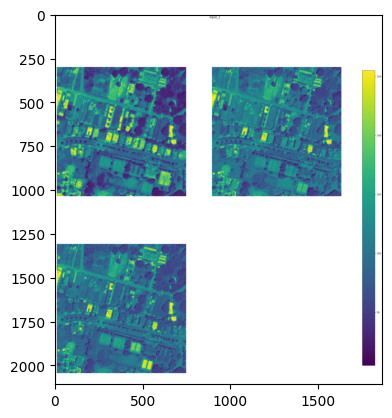

In [139]:
plt.imshow(Image.open('./content/activations/0_input_1.png'))

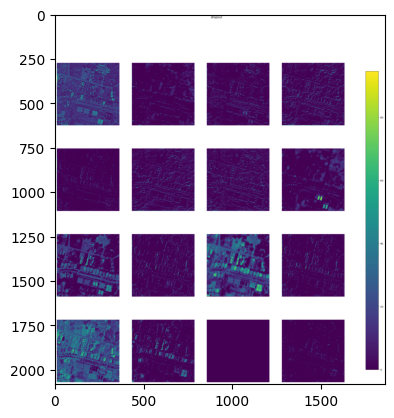

In [140]:
plt.imshow(Image.open('./content/activations/2_dropout.png'))

In [141]:
image = Image.open('./content/image 43.jpg')
image = image.resize((256,256))
image_as_array = np.array(image)
image_as_array = image_as_array.astype(np.float32)
ke.display_heatmaps(activations, image_as_array, save=True, directory='./content/heatmap/')

input_1 (1, 256, 256, 3) 
conv2d (1, 256, 256, 16) 
dropout (1, 256, 256, 16) 
conv2d_1 (1, 256, 256, 16) 
max_pooling2d (1, 128, 128, 16) 
conv2d_2 (1, 128, 128, 32) 
dropout_1 (1, 128, 128, 32) 
conv2d_3 (1, 128, 128, 32) 
max_pooling2d_1 (1, 64, 64, 32) 
conv2d_4 (1, 64, 64, 64) 
dropout_2 (1, 64, 64, 64) 
conv2d_5 (1, 64, 64, 64) 
max_pooling2d_2 (1, 32, 32, 64) 
conv2d_6 (1, 32, 32, 128) 
dropout_3 (1, 32, 32, 128) 
conv2d_7 (1, 32, 32, 128) 
max_pooling2d_3 (1, 16, 16, 128) 
conv2d_8 (1, 16, 16, 256) 
dropout_4 (1, 16, 16, 256) 
conv2d_9 (1, 16, 16, 256) 
conv2d_transpose (1, 32, 32, 128) 
concatenate (1, 32, 32, 256) 
conv2d_10 (1, 32, 32, 128) 
dropout_5 (1, 32, 32, 128) 
conv2d_11 (1, 32, 32, 128) 
conv2d_transpose_1 (1, 64, 64, 64) 
concatenate_1 (1, 64, 64, 128) 
conv2d_12 (1, 64, 64, 64) 
dropout_6 (1, 64, 64, 64) 
conv2d_13 (1, 64, 64, 64) 
conv2d_transpose_2 (1, 128, 128, 32) 
concatenate_2 (1, 128, 128, 64) 
conv2d_14 (1, 128, 128, 32) 
dropout_7 (1, 128, 128, 32) 
conv2